**A CNN architecture to classify the MNIST handwritten dataset**

In [1]:
#importing library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
#load the MNIST handwritten dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


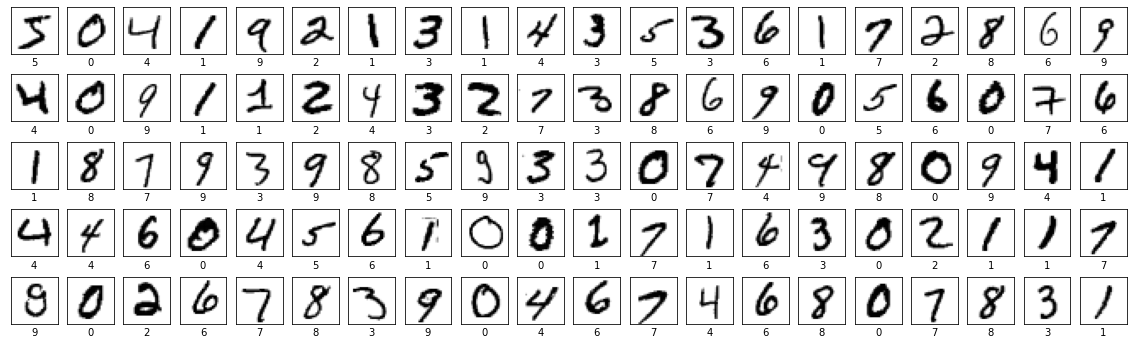

In [4]:
#printing data
plt.figure(figsize = (20, 6))
for i in range(100):
  plt.subplot(5, 20, i+1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(Y_train[i])
plt.show()

In [5]:
#preprocessing data
X_train, X_test = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255, X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [6]:
#creating the sequential model
model = tf.keras.Sequential([
	tf.keras.Input(shape=(28, 28, 1)),
	tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
	tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

**For Adam Optimizer**

In [7]:
model.compile(
	optimizer = tf.keras.optimizers.Adam(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

In [8]:
#model training
h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 25s 18ms/step - loss: 0.1986 - accuracy: 0.9410 - val_loss: 0.0749 - val_accuracy: 0.9766
Epoch 2/20
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0690 - val_accuracy: 0.9801
Epoch 3/20
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0496 - val_accuracy: 0.9840
Epoch 4/20
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0329 - accuracy: 0.9892 - val_loss: 0.0443 - val_accuracy: 0.9867
Epoch 5/20
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0470 - val_accuracy: 0.9869
Epoch 6/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0598 - val_accuracy: 0.9850
Epoch 7/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.0490 -

In [9]:
#model training
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 1s 5ms/step - loss: 0.0455 - accuracy: 0.9919

Test accuracy: 0.9919000267982483


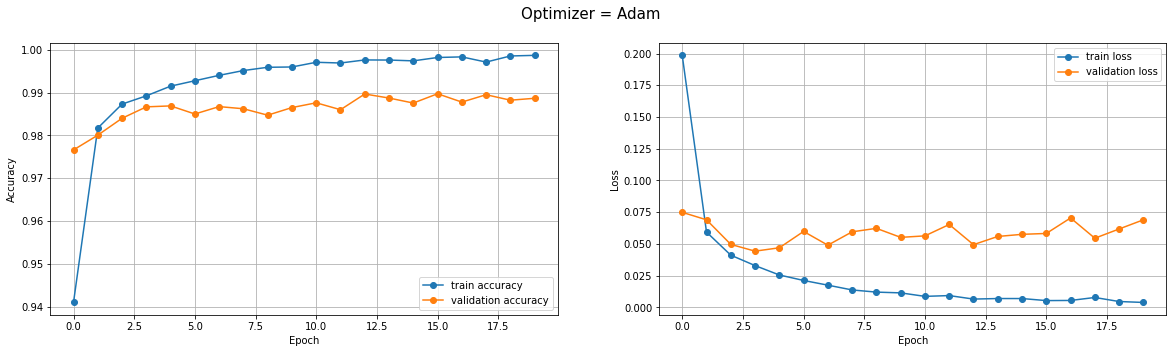

In [10]:
#Plotting the result for Adam
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = Adam', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**For SGD Optimizer**

In [14]:
model.compile(
	optimizer = tf.keras.optimizers.SGD(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 24s 18ms/step - loss: 1.1353e-11 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9904
Epoch 2/20
1313/1313 [==============================] - 23s 18ms/step - loss: 1.1353e-11 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9904
Epoch 3/20
1313/1313 [==============================] - 24s 18ms/step - loss: 1.1353e-11 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9904
Epoch 4/20
1313/1313 [==============================] - 24s 18ms/step - loss: 1.1353e-11 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9904
Epoch 5/20
1313/1313 [==============================] - 24s 18ms/step - loss: 1.1353e-11 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9904
Epoch 6/20
1313/1313 [==============================] - 24s 18ms/step - loss: 1.1353e-11 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9904
Epoch 7/20
1313/1313 [==============================] - 24s 18ms/step - loss: 1.1353e-11 - accuracy:

In [15]:
#model training
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 5ms/step - loss: 0.1010 - accuracy: 0.9935

Test accuracy: 0.9934999942779541


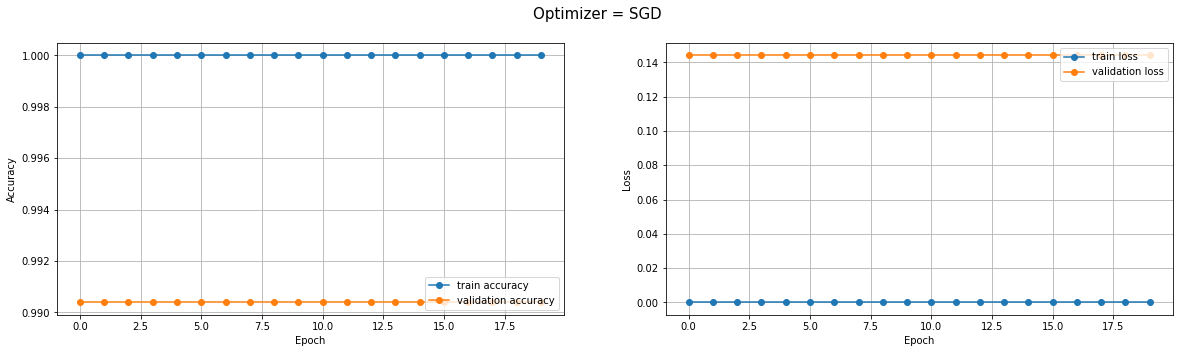

In [16]:
# Plotting the result for SGD
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = SGD', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**For RMSprop Optimizer**

In [11]:
model.compile(
	optimizer = tf.keras.optimizers.RMSprop(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0901 - val_accuracy: 0.9902
Epoch 2/20
1313/1313 [==============================] - 23s 18ms/step - loss: 4.6965e-04 - accuracy: 0.9998 - val_loss: 0.0884 - val_accuracy: 0.9911
Epoch 3/20
1313/1313 [==============================] - 23s 17ms/step - loss: 2.3022e-04 - accuracy: 0.9999 - val_loss: 0.1049 - val_accuracy: 0.9902
Epoch 4/20
1313/1313 [==============================] - 24s 18ms/step - loss: 2.0227e-04 - accuracy: 0.9999 - val_loss: 0.1170 - val_accuracy: 0.9904
Epoch 5/20
1313/1313 [==============================] - 23s 18ms/step - loss: 1.0726e-04 - accuracy: 1.0000 - val_loss: 0.1155 - val_accuracy: 0.9906
Epoch 6/20
1313/1313 [==============================] - 24s 18ms/step - loss: 1.0373e-04 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9901
Epoch 7/20
1313/1313 [==============================] - 24s 18ms/step - loss: 1.4487e-05 - accuracy: 1.0

In [12]:
# model training
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 5ms/step - loss: 0.1010 - accuracy: 0.9935

Test accuracy: 0.9934999942779541


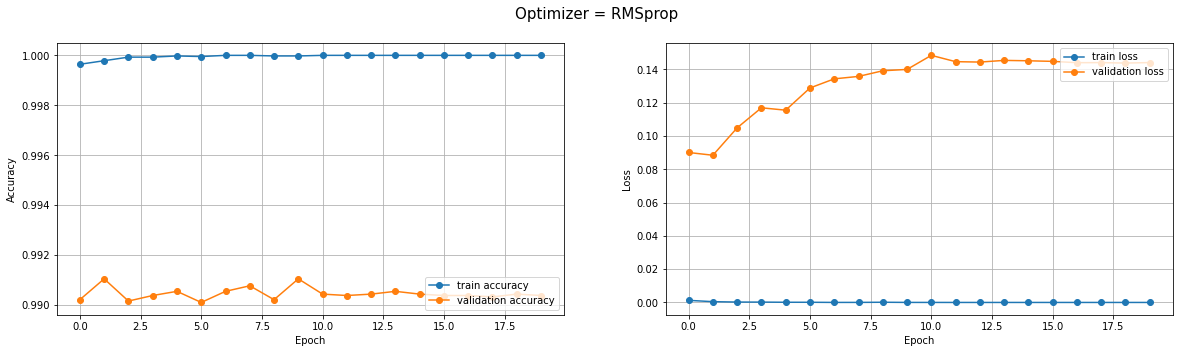

In [13]:
# Plotting the result for RMSprop
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = RMSprop', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()